In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("realistic_network_data.csv")

In [4]:
df.shape

(10000000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   duration       float64
 1   protocol_type  object 
 2   service        object 
 3   flag           object 
 4   src_bytes      int64  
 5   dst_bytes      int64  
 6   land           int64  
 7   count          int64  
 8   srv_count      int64  
 9   result         object 
dtypes: float64(1), int64(5), object(4)
memory usage: 762.9+ MB


In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,count,srv_count,result
0,15.6,icmp,finger,OTH,2039,575,0,12,9,normal
1,13.7,arp,cifs,ECE,2507,684,0,17,6,normal
2,7.3,eigrp,ncp,SYN,1894,1836,0,15,4,normal
3,7.9,ospf,irc,SHR,4500,3293,0,8,2,normal
4,1.8,tcp,irc,CWR,2524,477,0,18,6,normal


Text(0.5, 1.0, 'Correlation Heatmap')

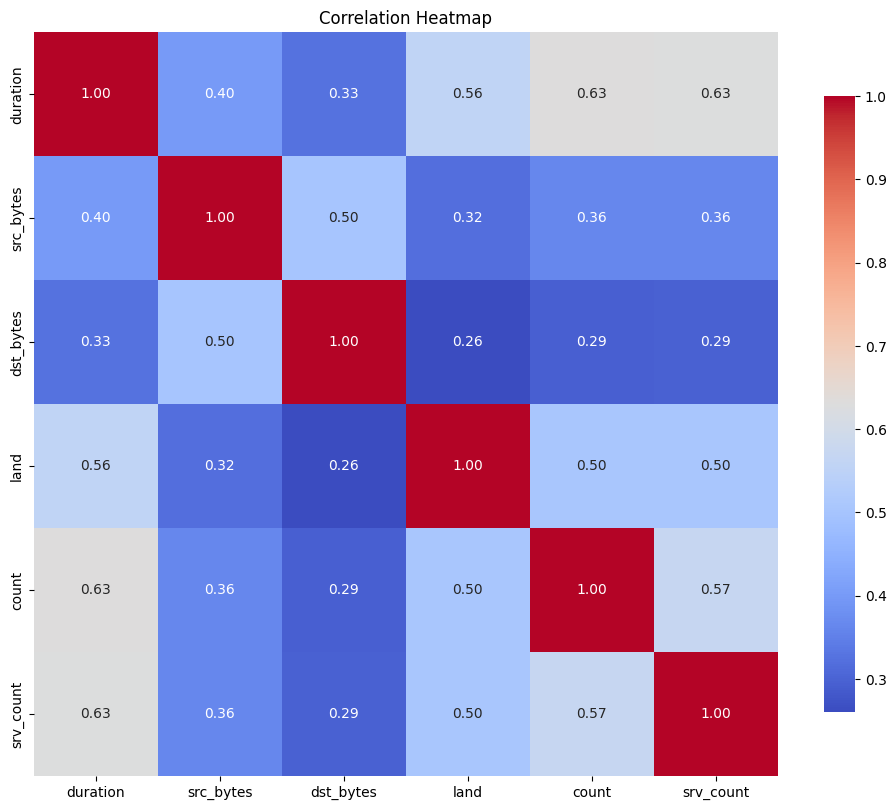

In [8]:
corr = df[["duration", "src_bytes", "dst_bytes", "land", "count", "srv_count"]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap')

In [9]:
corr

,duration,src_bytes,dst_bytes,land,count,srv_count
duration,1.000000,0.401288,0.325926,0.557007,0.630303,0.629998
src_bytes,0.401288,1.000000,0.500280,0.319998,0.362624,0.362303
dst_bytes,0.325926,0.500280,1.000000,0.260026,0.294514,0.294763
land,0.557007,0.319998,0.260026,1.000000,0.503750,0.503184
count,0.630303,0.362624,0.294514,0.503750,1.000000,0.570295
srv_count,0.629998,0.362303,0.294763,0.503184,0.570295,1.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

df.fillna(method='ffill', inplace=True)

df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])

scaler = StandardScaler()
df[['duration', 'src_bytes', 'dst_bytes', 'land', 'count', 'srv_count', 'result']] = scaler.fit_transform(
    df[['duration', 'src_bytes', 'dst_bytes', 'land', 'count', 'srv_count', 'result']]
)

X = df.drop('result', axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model.pkl')
